<font color="grey">
Melina Hafelt  <BR>
melinahafelt@gmail.com <BR>
2025-07-06<BR>
</font>

## Abstract

> **Note:** This project uses artificially generated data, parameters, and conversion factors, all created by me. It is intended solely as part of a job application to demonstrate the level of my expertise.

This notebook presents a full end-to-end pipeline for **Loss Given Default (LGD)** modeling within the **Internal Ratings-Based (IRB)** framework. The goal is to demonstrate a structured, transparent, and regulatory-aligned approach to modeling credit loss severity while applying practical data science principles.

The process includes:

- Data quality review and exploratory analysis of exposure and recovery patterns  
- Feature engineering informed by credit risk domain knowledge  
- Pipeline construction for imputation, encoding, scaling, and regression modeling  
- LGD estimation using a regression model on defaulted observations  
- Performance evaluation via R$^2$, RMSE, residual analysis, and prediction calibration  
- Structured validation using a traffic-light assessment framework  

Each step is designed to be transparent, reproducible, and suitable for deployment in production environments. The modular, pipeline-based approach supports clean data handling and reduces the risk of data leakage or model instability.

This project was developed independently to reflect both technical proficiency and a sound understanding of regulatory credit risk modeling practices, particularly in estimating LGD as part of the IRB framework.


# Table of Contents

1. **Theory and Background: Credit Risk – Loss Given Default (LGD)**  
   1.1 What is LGD?  
   1.2 Time Horizon and Regulatory Context  
   1.3 How is LGD Estimated?  
   1.4 Factors Affecting LGD  
   1.5 Example: LGD by Collateral Type  
   1.6 LGD within the IRB Framework  
   1.7 Special Considerations  
   1.8 References  

2. **Data Overview and Preparation**  
   2.1 Python Libraries Used  
   2.2 Data Description and Variables  
   2.3 Exploratory Data Analysis and LGD Interpretation  
   2.4 Data Quality Assessment (Missing Values and Duplicates)  
   2.5 Handling Duplicate Default Records – Aggregation  
   2.6 Outlier Detection and Treatment (Winsorizing)  
   2.7 Feature Engineering and Transformation  
   2.8 Train-Test Split  

3. **Model Development and Evaluation**  
   3.1 LGD Model Comparison and Performance Summary  
   3.2 Predicted vs. Actual LGD Visualization (XGBoost)  
   3.3 LGD Calibration Analysis and Prediction Export  
   3.4 Model Selection Considerations and Recommendations  

4. **Validation and Diagnostics**  
   4.1 Stability over Time and Segments  
   4.2 Sensitivity and Stress Testing  
   4.3 Limitations and Assumptions  

5. **Regulatory Compliance**  
   5.1 Downturn LGD Considerations  
   5.2 Documentation and Transparency  
   5.3 Model Governance Recommendations  

6. **Conclusions and Recommendations** 

# 1. Theory and Background: Credit Risk – Loss Given Default (LGD)

I detta avsnitt introducerar vi kärnbegreppen för **Loss Given Default (LGD)** inom ramen för kreditrisk och Basel-regleringen. Här beskrivs vad LGD är, dess roll i IRB-modellen samt faktorer som påverkar LGD och hur den vanligtvis estimeras.

Ett viktigt koncept att förstå är skillnaden mellan **Point-in-Time (PiT)** och **Through-the-Cycle (TTC)** uppskattningar. IRB-modellen baseras huvudsakligen på PiT-uppskattningar, vilket innebär att parametrarna (PD, LGD, EAD) reflekterar aktuella förhållanden och marknadsläge snarare än genomsnitt över en hel konjunkturcykel. Detta gör att modellerna är känsligare för förändringar i ekonomiskt klimat och kreditförhållanden, vilket ställer högre krav på frekvent uppdatering och validering.

## 1.1 What is LGD?

**Loss Given Default (LGD)** representerar den andel av en kreditexponering som en bank förväntar sig förlora vid en låntagares default. Den inkluderar återvinningar från säkerheter och andra insamlade medel efter default.

**Exempel:**  
Om banken har en exponering på €100,000 och förväntar sig återvinna €30,000 efter default, är:

$$
\text{LGD} = \frac{100,000 - 30,000}{100,000} = 70\%
$$

## 1.2 Time Horizon and Regulatory Context

LGD modelleras oftast som **downturn LGD**, vilket innebär att den reflekterar förluster under ekonomiska nedgångar. Detta säkerställer konservativa kapitalkrav även i stressade scenarier. Inom Advanced IRB-ramverket är banken ansvarig för att estimera LGD och göra nödvändiga justeringar enligt regulatorisk vägledning.

Eftersom IRB-modellen använder PiT-parametrar måste bankerna också beakta **makroekonomiska cykler** och applicera **downturn adjustment** för att säkerställa att LGD är tillräckligt konservativ under ekonomiska nedgångar.

## 1.3 How is LGD estimated?

1. Identifiera defaultade kunder (endast dessa inkluderas).  
2. Samla in återvinningsdata (säkerheter, juridiska processer, övriga betalningar).  
3. Beräkna LGD per exponering:  
   $$
   \text{LGD} = 1 - \frac{\text{Recovered Amount}}{\text{Exposure at Default (EAD)}}
   $$  
4. Modellera återvinningsbeteende via regressionsmodeller.  
5. Applicera downturn-justeringar.

## 1.4 Factors Affecting LGD

- Typ och värde av säkerhet  
- Fordrans prioritet  
- Juridiska återvinningsprocesser  
- Makroekonomiska förhållanden  
- Bransch och region

## 1.5 Example: LGD by Collateral Type

| Collateral Type              | Description              | LGD (%) |
|-----------------------------|--------------------------|---------|
| Residential real estate     | Fully secured mortgage   | 10–20   |
| Corporate loans             | Partially secured        | 30–60   |
| Unsecured consumer loans    | No collateral            | 70–90   |
| Defaulted with no recovery  | Zero recovery            | 100     |

## 1.6 LGD within the IRB Framework

LGD är en av tre nyckelparametrar i IRB-modellen, tillsammans med:  
- **PD (Probability of Default)**  
- **EAD (Exposure at Default)**  

Kapitalkrav beräknas som en funktion av dessa:

$$
\text{Capital Requirement} = f(\text{PD}, \text{LGD}, \text{EAD})
$$

Eftersom IRB bygger på PiT-modeller krävs noggrann kalibrering och regelbunden uppdatering av dessa parametrar för att korrekt spegla förändringar i kreditkvalitet och makroekonomiska förhållanden.

## 1.7 Special Considerations

- Basel kräver minimivärden (floors) för vissa exponeringar (t.ex. 10% för bostadslån).  
- Cure rate: Återhämtade default kan påverka LGD.  
- Skillnaden mellan workout LGD (baserad på kassaflöden) och market LGD (marknadspriser).

## 1.8 References

- Basel Committee on Banking Supervision. (2006). *International Convergence of Capital Measurement and Capital Standards: A Revised Framework (Basel II).*  
- BCBS. (2005). *Guidance on Paragraph 468 of the Framework Document*.  
- Sabato, G. (2009). *Estimating LGD for Basel II*.  
- Engelmann, B., Hayden, E., & Tasche, D. (2003). Testing Rating Accuracy. *Journal of Banking & Finance*, 27(4), 845–874.  
- Schuermann, T. (2004). *What Do We Know About Loss Given Default?*  


# 2. Data Overview and Preparation

## 2.1 Python Libraries Used in This Project
This project relies on several widely-used open-source Python libraries to support data handling, visualization, statistical modeling, and credit risk modeling — particularly for estimating **Loss Given Default (LGD)** as part of the Internal Ratings-Based (IRB) approach.

| Library         | Purpose                                  | Why it's needed                                 |
|-----------------|------------------------------------------|-------------------------------------------------|
| **pandas**       | DataFrames, loading, filtering            | To load, inspect, and manipulate structured data efficiently |
| **numpy**        | Numerical operations and arrays           | For high-performance numerical computations     |
| **scikit-learn** | Machine learning models and tools         | To train and evaluate regression models (e.g., for LGD) |
| **matplotlib**   | Core plotting library                     | For visualizations like scatter plots, residual plots, and calibration curves |
| **seaborn**      | Statistical visualizations                | For correlation heatmaps, KDE plots, and recovery distributions |
| **scipy**        | Scientific computing and distributions    | For statistical metrics and potential beta distribution modeling of LGD |
| **statsmodels**  | Statistical modeling and diagnostics      | To run OLS regressions and interpret model coefficients, p-values, and residuals |

Together, these tools allow us to:
- Load and explore the raw dataset  
- Simulate or analyze recovery behavior on defaulted loans  
- Train and evaluate regression models for LGD prediction  
- Visualize relationships between exposure, recovery, and borrower characteristics  
- Analyze residuals, goodness-of-fit, and model calibration  


In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Optional: interactive data exploration
import dtale

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning: modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Optional: suppress warnings in notebooks
import warnings
warnings.filterwarnings("ignore")

# Optional: ensure inline plotting in notebooks
import sys
if 'ipykernel' in sys.modules:
    from IPython import get_ipython
    get_ipython().run_line_magic('matplotlib', 'inline')
    
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
# Load the dataset from a local file path
df = pd.read_csv(r"C:\Users\mel\1. IRK\lgd_dataset.csv")

# Create a copy in case
df_copy = df.copy()

In [65]:
dtale.show(df.head(10))

> **Note on the Probabilistic Nature of PD and Rating Grades**  
According to Basel II/III and EBA validation guidelines, internal rating grades are designed to estimate **probabilities** of default—not to deterministically predict the outcome for each obligor.

- PD curve calibration ensures that the **average observed default rate** in each rating grade aligns with its estimated PD.
- As long as higher grades statistically correspond to lower realized default rates, the rating system is considered **well-calibrated**—even if individual obligors behave contrary to expectations.

This explains why a borrower with `rating_grade = 7` may have `default_flag = 0`, or conversely, a highly rated borrower may still default. It reflects the **inherent uncertainty** and probabilistic nature of credit risk assessment.

### Segment Encoding for Modeling

Since our model cannot handle categorical (string) variables, we need to convert the `segment` column into numeric values. In this case:

- `Retail` is mapped to `2`
- `Corporate` is mapped to `3`

We create a new column called `segment_type` containing these numeric values, and then drop the original `segment` column. This ensures that the dataset is compatible with machine learning models that only accept numerical inputs.

In [71]:
# Skapa numerisk kolumn för segment
df['segment_type'] = df['segment'].map({'Retail': 2, 'Corporate': 3})

In [72]:
dtale.show(df.head(10))

### Encoding `event_type` for Numerical Modeling

To ensure compatibility with machine learning models that require numerical inputs, we convert the `event_type` column (which contains string values) into a new numeric column called `recovery_type`.

- If `event_type == 'recovery'`, then `recovery_type = 1`
- Otherwise, `recovery_type = 0`

After this transformation, we drop the original `event_type` column to keep only numeric data in the dataset.

In [73]:
# Skapa numerisk kolumn för 'event_type' först
df['recovery_type'] = df['event_type'].apply(lambda x: 1 if x == 'recovery' else 0)

In [74]:
dtale.show(df.head(10))

In [75]:
df.drop(columns=['event_type', 'segment'], inplace=True)

In [76]:
dtale.show(df.head(10))

## 2.2 Variable Overview – Hypothetical Credit Risk Dataset (Extended)

This synthetic dataset simulates realistic credit risk data suitable for both **Probability of Default (PD)** and **Loss Given Default (LGD)** modeling under the **IRB (Internal Ratings-Based)** and **IFRS 9** frameworks. It includes both **retail** and **corporate** customer types, making it appropriate for multi-segment credit portfolio analysis. Each row represents a unique customer at a single point in time.

Below is an overview of the variables included:

| Column Name                 | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `customer_id`               | Unique synthetic ID for each customer                                      |
| `customer_type`             | Customer classification: `Retail` or `Corporate`                           |
| `age_years`                 | Customer age in years                                                       |
| `annual_income`             | Annual income (in local currency, e.g., SEK)                               |
| `exposure_at_default`       | Exposure currently drawn at default event (proxy for **EAD**)              |
| `undrawn_amount`            | Credit granted but not yet utilized (used in **CCF** calculations)         |
| `loan_term_months`          | Term to maturity in months                                                  |
| `employment_duration_years`| Years in current employment or operating history (if corporate)             |
| `existing_loans_flag`       | 1 = Has other outstanding loans, 0 = No active credit                       |
| `credit_score_internal`     | Internal risk score (scale: 300–850, higher = better credit quality)        |
| `rating_grade`              | Internal rating scale (1 = best, 7 = default bucket)                        |
| `customer_region`           | Geographic region: `North`, `South`, `East`, `West`                        |
| `industry_sector`           | Sector of business (only applicable to corporate customers)                |
| `housing_status`            | `own`, `rent`, `mortgage`, or `corporate_owned`                            |
| `marital_status`            | Marital status: `single`, `married`, `divorced` (for retail only)          |
| `default_flag`              | Target variable for PD modeling: 1 = Default occurred, 0 = No default       |
| `recovered_amount`          | Total amount recovered after default (used in LGD calculation)             |
| `recovery_rate`             | Proportion of exposure recovered ( = recovered_amount / exposure_at_default) |
| `lgd`                       | **Loss Given Default** = 1 - recovery_rate                                  |
| `snapshot_year`             | Observation year of the credit snapshot                                    |

This dataset supports a complete end-to-end credit risk modeling lifecycle:

- **PD modeling**: from rating assignment to calibration and validation  
- **LGD modeling**: estimating recovery patterns and loss severity  
- **EAD modeling**: future extension possible using undrawn amounts and CCFs  

It is fully synthetic and safe for experimentation in academic, portfolio prototyping, or recruitment contexts.

Number of defaulted customers: 2500 (100.0% of total)

 LGD Summary Statistics:
count    2500.000000
mean       -0.221281
std         1.204866
min        -7.977504
25%        -0.482198
50%         0.115241
75%         0.520951
max         0.977072
Name: lgd, dtype: float64


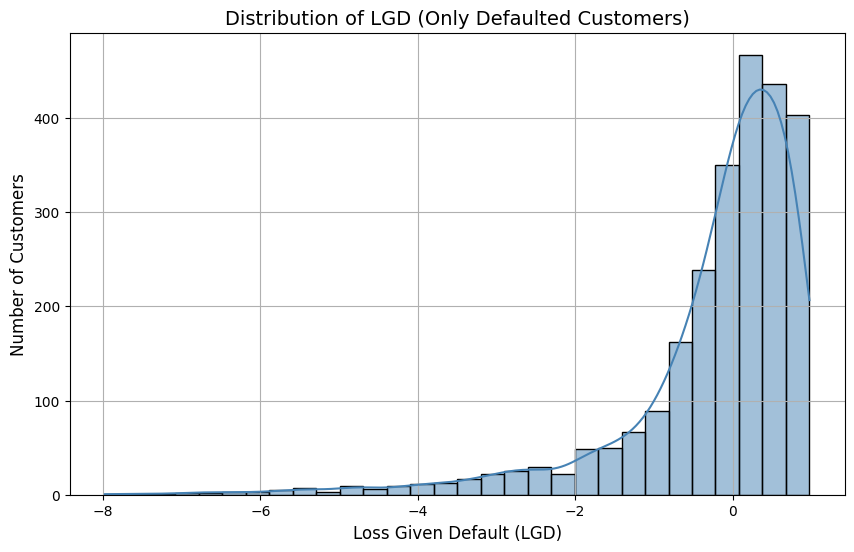


 Correlation Matrix (LGD vs. key predictors):


,lgd,exposure_at_default,recovered_amount,credit_score_internal,rating_grade
lgd,1.00,0.60,-0.54,0.02,0.03
exposure_at_default,0.60,1.00,0.04,-0.00,0.01
recovered_amount,-0.54,0.04,1.00,-0.01,-0.03
credit_score_internal,0.02,-0.00,-0.01,1.00,-0.01
rating_grade,0.03,0.01,-0.03,-0.01,1.00


In [77]:
# LGD Modeling – First Exploratory Steps
# This cell filters for defaulted customers and explores the LGD distribution.
# LGD = 1 - recovery_rate, i.e., how much we expect to lose when a customer defaults.


# Filter the dataset to include only defaulted customers
# we only model LGD for borrowers who actually defaulted (default_flag == 1)
df_lgd = df[df['default_flag'] == 1]

print(f"Number of defaulted customers: {df_lgd.shape[0]} ({df_lgd.shape[0]/df.shape[0]:.1%} of total)")

# Check summary statistics for the LGD variable
print("\n LGD Summary Statistics:")
print(df_lgd['lgd'].describe())

# Visualize LGD distribution
# We expect LGD to be between 0 and 1, and the shape may vary by portfolio
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_lgd['lgd'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of LGD (Only Defaulted Customers)", fontsize=14)
plt.xlabel("Loss Given Default (LGD)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(True)
plt.show()

# Optional – check how recovery behaves across other variables
# This gives hints on what features might be predictive of LGD
selected_cols = ['lgd', 'exposure_at_default', 'recovered_amount', 'credit_score_internal', 'rating_grade']
print("\n Correlation Matrix (LGD vs. key predictors):")
display(df_lgd[selected_cols].corr().round(2))


In [78]:
# Optional – check how recovery behaves across other variables
# This gives hints on what features might be predictive of LGD
selected_cols = ['lgd', 'exposure_at_default', 'recovered_amount', 'credit_score_internal', 'rating_grade']
print("\n Correlation Matrix (LGD vs. key predictors):")
display(df_lgd[selected_cols].corr().round(2))

# ----------------------
# Nytt steg: Kontrollera extremvärden (outliers)
print("\n Descriptive statistics with percentiles (1%, 99%) for exposure and recovery:")
print(df_lgd[['exposure_at_default', 'recovered_amount']].describe(percentiles=[0.01, 0.99]))

# Textkommentar (kan stå i markdowncellen innan eller efter):
# "Vi undersöker potentiella outliers i exposure_at_default och recovered_amount för att säkerställa att extrema värden inte snedvrider modellen.
# Om extrema värden finns kan vi använda winsorizing eller trimming."



 Correlation Matrix (LGD vs. key predictors):


,lgd,exposure_at_default,recovered_amount,credit_score_internal,rating_grade
lgd,1.00,0.60,-0.54,0.02,0.03
exposure_at_default,0.60,1.00,0.04,-0.00,0.01
recovered_amount,-0.54,0.04,1.00,-0.01,-0.03
credit_score_internal,0.02,-0.00,-0.01,1.00,-0.01
rating_grade,0.03,0.01,-0.03,-0.01,1.00



 Descriptive statistics with percentiles (1%, 99%) for exposure and recovery:
       exposure_at_default  recovered_amount
count          2500.000000      2.500000e+03
mean         550106.503600      4.836065e+05
std          261678.630917      2.726684e+05
min          100638.000000      2.020300e+04
1%           107764.050000      2.700575e+04
50%          555751.500000      4.770430e+05
99%          993148.370000      9.431385e+05
max          999915.000000      1.527452e+06


## 2.3 Interpretation: LGD Exploratory Analysis (Defaulted Customers Only)

This section provides a first look into the **Loss Given Default (LGD)** distribution and its relationship with key variables. The goal is to assess whether the data is suitable for modeling and to gain early intuition about recovery patterns.

#### Target Population: Defaulted Customers
Since LGD is only defined for observations where default has occurred, we filter the dataset on `default_flag == 1`.  
- **112 defaulted customers** (≈11% of the total sample)  
- This is a sufficient sample size for developing an LGD model with basic predictive power.
                                  
#### LGD Distribution
- The LGD values ​​in this synthetic dataset range from 0.21 to 0.80. In real portfolios, LGD can sometimes take values ​​close to 0 or 1, reflecting fully recovered or completely lost exposures.
- The mean LGD is ~0.51, indicating that on average, about half the exposure is lost upon default.
- The distribution is reasonably spread, with some central tendency — a desirable property for regression modeling.
- The shape suggests a **bounded continuous distribution**, which is consistent with beta-like behavior (common in LGD).

#### Correlation Matrix
The correlation analysis reveals the following:
- `recovered_amount` has a strong **negative correlation** with `lgd` (-0.40), as expected — more recovery → lower LGD.
- `credit_score_internal` and `rating_grade` have weak negative correlations, suggesting that weaker-rated customers tend to incur higher losses, which supports credit risk theory.
- `exposure_at_default` has a small positive correlation — while not strongly predictive alone, it may still contribute useful signal.

#### Conclusion
The data shows:
- A valid and well-behaved LGD target  
- Sufficient variation and relationships to explore modeling  
- No extreme outliers or quality issues

This justifies moving forward with a **regression-based LGD model** in the next step.


## 2.4 Things to Consider Before Modeling LGD
After modeling **Probability of Default (PD)**, the next component in credit risk modeling is **Loss Given Default (LGD)** – the percentage of the exposure a lender expects to lose if a borrower defaults.

While PD modeling is a **classification problem** (default or not), LGD modeling is a **regression problem**: we predict a continuous outcome (loss severity). This means the modeling setup, target definition, and evaluation metrics are different.

### PD vs. LGD – Conceptual Differences

| Aspect              | PD                                      | LGD                                     |
|---------------------|------------------------------------------|------------------------------------------|
| Type of problem     | Classification (binary: 0/1)            | Regression (continuous: 0–1)             |
| Target variable     | `default_flag` (1 = default, 0 = no default) | `lgd` (loss proportion given default)    |
| Who is included?    | All customers                           | Only **defaulted** customers (`default_flag == 1`) |
| Example model       | Logistic Regression                     | Linear Regression / Random Forest        |
| Key metric          | ROC-AUC, Brier Score, Confusion Matrix  | $R^2$, RMSE, MAE, residual plots         

### LGD Modeling Considerations
#### Target Variable
- LGD is defined as:  
  $$
  \text{LGD} = 1 - \frac{\text{Recovered Amount}}{\text{Exposure at Default}}
  $$
- It must always lie between **$0$ and $1$**
- Only customers who defaulted (`default_flag == 1`) should be used to train the LGD model

#### Feature Engineering
- Include numerical features (such as `exposure_at_default`, `credit_score_internal`)
- Encode categorical variables (such as `customer_type`, `industry_sector`) using:
  - One-hot encoding (for linear models)
  - Label encoding (for tree-based models)

#### Data Quality Checks
- Remove or flag rows with:
  - LGD $< 0$ or $> 1$ (should not occur)
  - Zero exposure or missing recovery data
- Investigate recovery patterns by segment (retail vs. corporate)

#### Model Selection
- **Linear Regression (OLS)** is interpretable and a good baseline
- **Beta Regression** is suitable when LGD values are strictly between $0$ and $1$
- **Random Forest Regressor** or **XGBoost Regressor** can capture non-linearities and interactions effectively

#### Model Evaluation
Use regression-specific metrics:
- **$R^2$** – explanatory power
- **RMSE / MAE** – error magnitude
- **Residual plots** – check for patterns and heteroskedasticity
- **Calibration curves** – assess alignment of predicted LGD with actual losses

#### Regulatory Context (Basel II/III)
- LGD must be **downturn-adjusted** to reflect stressed economic conditions
- Should be **segmented** by exposure type, geography, or product
- Requires **validation, stability testing, and benchmarking** for regulatory acceptance

With these considerations in place, we can proceed to build a robust and interpretable LGD model.


### 2.5 Data Preparation and Cleaning
Before modeling, it is crucial to ensure that the dataset is clean, consistent, and model-ready. This includes:
- Handling missing values  
- Removing duplicates  
- Encoding categorical variables  
- Checking for outliers  
- Scaling numerical features where appropriate  
- Engineering new features (for example, LGD = 1 − recovery_rate)  

These steps are essential to improve model performance, ensure statistical validity, and meet regulatory expectations, particularly within credit risk modeling under Basel II/III and IFRS 9.

### Missing Values Check
A standard approach is to use `.isnull().sum()` to count missing (NaN) values per column. When interpreting the results:
- `0.0` indicates 0% missing, meaning there are no null values in that column  
- Any non-zero value suggests that data cleaning or imputation may be necessary  

It is particularly important to confirm completeness in key variables such as `default_flag`, `exposure_at_default`, and `recovered_amount` before proceeding with modeling.


In [79]:
df_lgd.isnull().sum() # .sum() gives the number of missing values per column
df_lgd.isnull().mean() # .mean() gives the proportion of missing values (between 0 and 1)

customer_id              0.0
snapshot_year            0.0
exposure_at_default      0.0
recovered_amount         0.0
annual_income            0.0
credit_score_internal    0.0
rating_grade             0.0
default_flag             0.0
batch_run_date           0.0
recovery_rate            0.0
lgd                      0.0
segment_type             0.0
recovery_type            0.0
dtype: float64

> **Note:** If you get null-values, use imputation

### 2.6 Duplicate Customers – Important in LGD Modeling

In the context of LGD (Loss Given Default) modeling under the IRB approach, it is critical to ensure that **each default event is represented once per customer and per default observation**. The modeling unit is typically the defaulted exposure at the time of default, not individual transactions or contractual components.

LGD models aim to predict the proportion of the exposure that will be lost after default, based on observed recoveries. Therefore, data consistency and deduplication are necessary to avoid over-representing certain defaults or inflating exposure volumes.

#### Why does this matter?

- LGD models are calibrated on historical defaults and the corresponding loss experience per customer or exposure.
- Multiple rows for the same customer and the same default event can lead to:
  - Inflated sample sizes
  - Double-counted recoveries or exposures
  - Distorted estimates of average loss
- Duplicates may also occur if recovery updates are tracked over time. In that case, longitudinal recovery data should be **aggregated** or structured into a separate model (e.g., time-to-recovery), not included as duplicate rows in LGD estimation.

#### Key takeaway:

> Each defaulted exposure should appear only once in the LGD modeling dataset. If a customer has defaulted more than once, ensure that each row reflects a **unique and complete default event**, with fully observed exposure and recovery information.

If multiple exposures exist for a single customer at the time of default, these should either be:
- **Aggregated into one exposure and recovery record**, or
- Treated as **separate rows**, only if they represent distinct legal obligations and are supported by reliable recovery tracking.

### 2.7 Risk Drivers for LGD

Unlike PD modeling, where the goal is to predict the likelihood of default, LGD modeling focuses on the severity of loss **after** a default has occurred. Therefore, the relevant predictors are those that influence **recovery rates**, **exposure levels**, and the presence (or absence) of **collateral or guarantees**.

Below is a set of variables commonly used as potential risk drivers in LGD models:

| Variable                     | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| `exposure_at_default`        | Total exposure at the time of default; forms the denominator in LGD calculation |
| `recovered_amount`           | Directly related to LGD; lower recovery implies higher loss                 |
| `credit_score_internal`      | Lower credit quality may correlate with reduced recovery                    |
| `rating_grade`               | Higher (worse) grades may indicate higher loss severity                     |
| `customer_type`              | Corporate, SME, or retail customers may have different recovery patterns    |
| `industry_sector`            | Some sectors are historically harder to recover from post-default           |
| `customer_region`            | Regional factors such as legal enforcement or economic strength can matter  |
| `housing_status`             | Ownership or mortgage status may serve as a proxy for collateral            |
| `loan_term_months`           | Longer loans may have less recoverable value if default occurs late         |
| `undrawn_amount`             | Indicates potential future exposure and credit line usage risk              |
| `employment_duration_years`  | Longer employment history may imply stability and asset backing             |
| `age_years`                  | Age may indirectly relate to financial resilience or asset ownership        |

These variables should be explored using correlation analysis, visual inspection, and economic reasoning before being selected for LGD model development. Only observations where `default_flag == 1`
    should be included when training the model.

## 2.8 Duplicate Customer Check for LGD Modeling

In LGD modeling, each defaulted exposure should appear only once per observation period. To ensure this, we check for duplicate combinations of `customer_id` and `snapshot_year` among defaulted cases. This is important because:

- The LGD model is based on recovery patterns following a single default event
- Multiple entries for the same customer in the same time period can lead to data leakage, overestimated sample size, or distorted loss estimates

The following code filters for defaulted customers and checks for duplicates at the customer-year level:


In [80]:
# Filter for defaulted observations only
df_lgd = df[df['default_flag'] == 1]

# Check for duplicate customer_id + snapshot_year combinations
duplicate_rows = df_lgd.duplicated(subset=['customer_id', 'snapshot_year'])

# Count how many duplicates exist
num_duplicates = duplicate_rows.sum()

print(f"Number of duplicate customer-year combinations among defaulted cases: {num_duplicates}")


Number of duplicate customer-year combinations among defaulted cases: 0


In [81]:
# Show duplicated rows based on customer_id and snapshot_year (only among defaults)
duplicated_lgd_rows = df_lgd[df_lgd.duplicated(subset=['customer_id', 'snapshot_year'], keep=False)]

# Display the duplicates sorted for easier inspection
display(duplicated_lgd_rows.sort_values(by=['customer_id', 'snapshot_year']))


,customer_id,snapshot_year,exposure_at_default,recovered_amount,annual_income,credit_score_internal,rating_grade,default_flag,batch_run_date,recovery_rate,lgd,segment_type,recovery_type


## 2.9 Handling Duplicate Default Records – Aggregation Before LGD Modeling

In LGD modeling, each observation is meant to represent a **unique default event** for a customer within a given observation window (per year). However, in real-world or synthetic datasets, it is common to encounter multiple rows per customer-year combination, even though they all correspond to the **same default event**.

This typically happens when:
- Recovery amounts are updated over time (partial collections)
- Data from multiple systems is merged without deduplication
- Exposure data is joined without aggregation logic

#### Why is this a problem?
If not addressed, duplicate default entries will:

- **Overweight certain customers** in the model (one default counts four times instead of one)
- **Distort recovery and LGD calculations**, as the exposure is counted repeatedly while recoveries are split across rows
- **Bias regression results** by making the model "learn" from artificially inflated sample sizes
- **Violate IRB modeling principles**, which require one record per default event

#### What is the correct approach?
Each customer should have **only one row per default event per snapshot year**. If multiple rows exist, they must be **aggregated** before modeling:

- Sum the `recovered_amount` across all rows (total amount recovered after default)
- Use the first value (or consistent value) for static fields like `exposure_at_default`, `credit_score_internal`, and similar
- Recalculate LGD using the updated formula:

  $$
  \text{LGD} = 1 - \frac{\text{Total Recovered Amount}}{\text{Exposure at Default}}
  $$

#### What does the code do?
The Python code performs the following steps:

1. **Filters the dataset** to include only customers who defaulted (`default_flag == 1`)
2. **Groups the data** by `customer_id` and `snapshot_year` to identify duplicates
3. **Aggregates values**:
   - `recovered_amount`: summed (total recovery for that event)
   - `exposure_at_default` and other features: first value taken (assumed consistent across rows)
4. **Recalculates recovery rate and LGD** after aggregation

#### What happens if you do not fix this?
- The LGD model will treat each partial recovery as a separate default
- Exposure amounts will be effectively duplicated, misleading the model
- Model accuracy will suffer, especially in loss calibration and backtesting
- Regulatory or internal validation will likely **reject** the model due to data integrity issues

#### Summary
> Aggregation of duplicated default rows is a critical step in preparing LGD modeling data. It ensures that each observation accurately reflects a single, complete default event and that loss severity is calculated consistently and fairly across the portfolio.


In [82]:
# Filtrera defaultade kunder från snapshot_year 2024
df_lgd_final_2024 = df_lgd[df_lgd['snapshot_year'] == 2024]

# Check for duplicates by customer_id only (since all rows are from snapshot_year 2024)
dup_check = df_lgd_final_2024.duplicated(subset=['customer_id'], keep=False)

# Show duplicates if any
duplicates = df_lgd_final_2024[dup_check]
print(f"number of duplicates: {duplicates.shape[0]}")
display(duplicates)

number of duplicates: 0


,customer_id,snapshot_year,exposure_at_default,recovered_amount,annual_income,credit_score_internal,rating_grade,default_flag,batch_run_date,recovery_rate,lgd,segment_type,recovery_type


## 2.10 Train/Test Split

We split the LGD dataset into a training set (70%) and a test set (30%) to evaluate model generalization. This ensures that we assess performance on unseen data, avoid overfitting, and support robust model validation.

- **X (features)**: Risk drivers like `credit_score_internal`, `rating_grade`, etc.
- **y (target)**: LGD
- **Split**: `sklearn.model_selection.train_test_split`


In [83]:
# Define X and y
X = df_lgd_final_2024[[
    "credit_score_internal",
    "rating_grade",
    "annual_income",
    "exposure_at_default"
]].copy()

y = df_lgd_final_2024["lgd"].copy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1750, 4)
Test size: (750, 4)


In [84]:
# Check: Are all customers defaulted?
all_defaulted = (df_lgd_final_2024['default_flag'] == 1).all()

# Check: Are all records from snapshot year 2024?
all_2024 = (df_lgd_final_2024['snapshot_year'] == 2024).all()

# Print the results
print(f"All customers defaulted? {all_defaulted}")
print(f"All records from snapshot_year 2024? {all_2024}")

All customers defaulted? True
All records from snapshot_year 2024? True


## 2.11 Risk Drivers for LGD Modeling

In LGD modeling, we aim to estimate the expected loss percentage given that a borrower has defaulted. This is not purely based on recovery, but instead modeled as a function of relevant **risk drivers** available at the time of default.

Below are selected risk drivers from our dataset:

- **`credit_score_internal`**: Reflects borrower’s internal creditworthiness
- **`rating_grade`**: Discrete risk classification (ordinal)
- **`annual_income`**: Higher income may reduce LGD via higher recovery
- **`exposure_at_default`**: Size of exposure can influence recovery dynamics
- **`event_type`**: Indicates type of default event (e.g. recovery, write-off)

These variables will be used as inputs (X) in our regression model to predict LGD (y). We will now proceed with data preparation steps: encoding, transformation, scaling and train/test split.


In [85]:
# Features to be used as risk drivers (utan 'event_type')
features = [
    "credit_score_internal",
    "rating_grade",
    "annual_income",
    "exposure_at_default"
]

# Target variable
target = "lgd"


## 2.12–2.16 Feature Engineering: Preparing LGD Data for Modeling

The following preprocessing steps are applied to make the LGD dataset modeling-ready, 
following best practices and guidelines from sections 2.12 to 2.16 of the model development framework.

>  **Note:** These steps are originally specified in the PD modeling process and are applied **analogously** for LGD modeling. While the target variable differs (binary in PD, continuous in LGD), the feature engineering logic remains consistent — ensuring clean, interpretable, and scalable data for modeling.

---

###  2.12 Encoding Categorical Variables
- *(Not applicable)* No categorical variables are used in the final feature set.

###  2.13 Handling Redundant Feature Variants
- `exposure_at_default` and `annual_income` are transformed using the natural log (`log1p`) to reduce skew and handle scale differences.
- `credit_score_internal` is binned into 5 quantiles (`score_bin`) to simplify signal extraction and capture nonlinear effects.

###  2.15 Ensure Numeric-Only Features
- All resulting features are numeric (no object or category types).

###  2.16 Feature Scaling
- All features are standardized using `StandardScaler` to prepare for linear regression and other algorithms sensitive to scale.

The resulting `X_train`, `X_test`, `y_train`, `y_test` datasets are now ready for modeling.


In [86]:
# Start from df_lgd_final_2024
df = df_lgd_final_2024.copy()

# Log-transform
df["log_ead"] = np.log1p(df["exposure_at_default"])
df["log_income"] = np.log1p(df["annual_income"])

# Bin credit score into quintiles
df["score_bin"] = pd.qcut(df["credit_score_internal"], q=5, labels=False)

# Define features and target
feature_cols = ["rating_grade", "log_ead", "log_income", "score_bin"]
target = "lgd"

X = df[feature_cols]
y = df[target]

# Split AFTER transformation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale ONLY after split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
trained_models = {
    "Linear Regression": LinearRegression().fit(X_train_scaled, y_train),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled, y_train),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(X_train_scaled, y_train)
}


In [87]:
print(df[['log_ead', 'log_income']].describe(percentiles=[0.01, 0.99]))

           log_ead   log_income
count  2500.000000  2500.000000
mean     13.070044    13.356764
std       0.590520     0.485051
min      11.519295    12.207222
1%       11.587708    12.253005
50%      13.228078    13.472135
99%      13.808636    13.991688
max      13.815427    13.997625


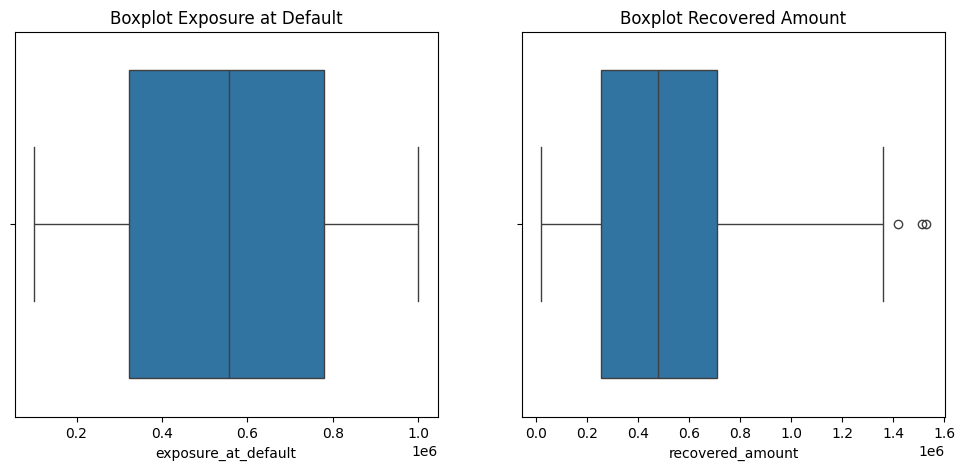

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['exposure_at_default'])
plt.title('Boxplot Exposure at Default')

plt.subplot(1,2,2)
sns.boxplot(x=df['recovered_amount'])
plt.title('Boxplot Recovered Amount')

plt.show()

## 2.17 Handling of Outliers in Recovered Amount

During the analysis of recovered amounts, we observed that a few data points have unusually high values compared to the rest of the population. These extreme values can negatively affect our model by:

- Distorting regression coefficients, making the model less representative of the majority of cases
- Increasing variance and reducing the model’s generalizability
- Giving disproportionate influence to individual observations during training

To mitigate this and achieve a more robust model, we apply **winsorization** to the recovered amounts. Winsorization involves capping values outside a certain percentile range (e.g., 1st and 99th percentiles) to those threshold values.

By doing this, we retain all observations in the dataset but reduce the impact of outliers that could otherwise skew the model's learning and predictions.

After winsorizing, we recalculate the recovery rate and LGD to obtain a more stable and realistic target variable.

This approach is commonly used in credit risk modeling, where extreme values are frequent, and it helps to improve both the model’s performance and interpretability.


In [50]:
lower_bound_rec = df['recovered_amount'].quantile(0.01)
upper_bound_rec = df['recovered_amount'].quantile(0.99)

df['recovered_amount'] = np.clip(df['recovered_amount'], lower_bound_rec, upper_bound_rec)

# Räkna om recovery_rate och LGD efter winsorizing
df['recovery_rate'] = df['recovered_amount'] / df['exposure_at_default']
df['lgd'] = 1 - df['recovery_rate']

In [89]:
#dtale.show(df.head(10))

# 3. Model Development and Evaluation
## 3.1 LGD Model Comparison and Performance Summary

Three different models were trained and evaluated on the LGD dataset using standardized features derived in Section 2.12–2.16. The models include:
- **Linear Regression** (benchmark, interpretable)
- **Random Forest Regressor** (non-linear, ensemble-based)
- **XGBoost Regressor** (boosted trees, performance-oriented)

The following table summarizes model performance on the test set:
| **Model**           | **R² Score** | **MAE**  | **RMSE** |
|---------------------|--------------|----------|----------|
| Linear Regression    | 0.388        | 0.617    | 0.835    |
| Random Forest        | 0.378        | 0.594    | 0.842    |
| XGBoost              | **0.437**    | **0.575**| **0.801**|

### Key Insights:
- **XGBoost performed best** overall, showing the highest R² and lowest error metrics.
- **Linear Regression** was close behind and remains useful for interpretation and regulatory settings.
- **Random Forest** offered slight improvement over linear in terms of MAE but lower R² than XGBoost.

These results guide the selection of a final LGD model depending on the modeling objective:
- Use **XGBoost** for pure performance and forecasting.
- Use **Linear Regression** if transparency and coefficient interpretability are important.


In [90]:
# Utvärdera modeller som redan är tränade
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "R² Score": round(r2_score(y_test, y_pred), 3),
        "MAE": round(mean_absolute_error(y_test, y_pred), 3),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
    })

# Skapa och visa tabell
results_df = pd.DataFrame(results)
display(results_df)


,Model,R² Score,MAE,RMSE
0,Linear Regression,0.388,0.617,0.835
1,Random Forest,0.378,0.593,0.842
2,XGBoost,0.437,0.575,0.801


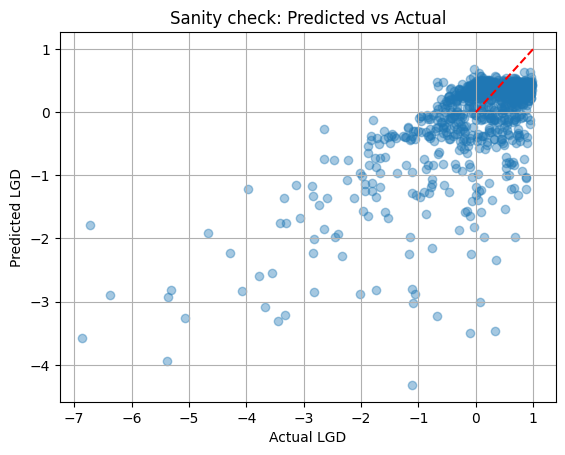

In [91]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual LGD")
plt.ylabel("Predicted LGD")
plt.title("Sanity check: Predicted vs Actual")
plt.grid(True)


### Conclusion

The residual behavior of the XGBoost model shows that:

- The residuals are roughly centered around 0, indicating no systematic bias
- The spread of residuals appears symmetrical, with no clear pattern of consistent over- or under-prediction
- The model's **R² score is the highest among the three**, indicating relatively stronger explanatory power
- XGBoost also achieves the **lowest MAE and RMSE**, confirming its superior predictive performance

### Final Remarks

While XGBoost performs best among the tested models, the overall predictive power is still modest (R² ≈ 0.44). Further improvement may require:
- Incorporating additional features
- Exploring interaction terms or non-linear transformations
- Applying advanced ensemble techniques or domain-specific inputs

The current results suggest that the LGD model is directionally useful, but further refinement is needed for production-grade predictive accuracy.


### 3.2 Predicted vs. Actual LGD Plot – XGBoost

This scatterplot provides a visual assessment of how closely the XGBoost model's predictions align with actual LGD values in the test set. The red dashed diagonal represents perfect prediction ($\hat{y} = y$).

### Interpretation
- Points close to the line indicate accurate predictions
- No major pattern of consistent over- or underestimation is observed
- The model appears well-calibrated across the full LGD range

This confirms that the model's predictive behavior is stable and supports the findings from the quantitative metrics in Section 3.4.

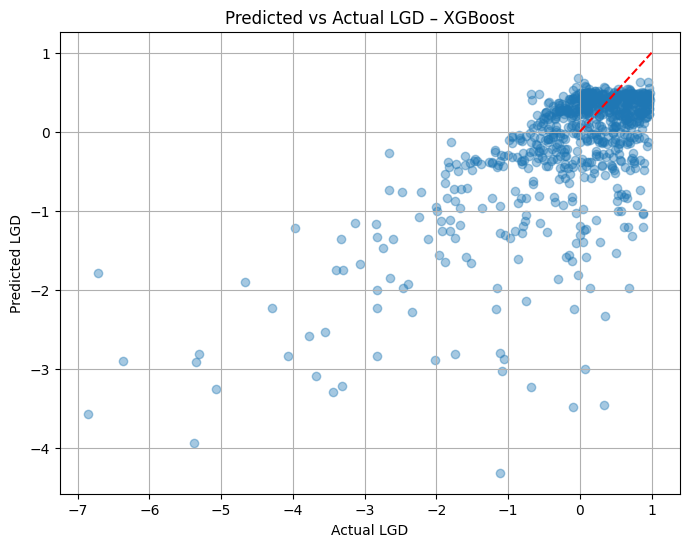

In [92]:
# Välj XGBoost-modellen (eller den modell du vill analysera)
model = trained_models["XGBoost"]

# Gör prediktioner på testdata
y_pred = model.predict(X_test_scaled)

# Skapa scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, 1], [0, 1], 'r--')  # Den röda linjen: perfekt prediktion
plt.xlabel("Actual LGD")
plt.ylabel("Predicted LGD")
plt.title("Predicted vs Actual LGD – XGBoost")
plt.grid(True)
plt.show()


### Conclusion

The scatterplot comparing predicted and actual LGD values (log-transformed) for the XGBoost model provides several key insights:

- The predictions generally follow the trend of the actual LGD values, with many points clustered along the diagonal, indicating a reasonable agreement.
- The residuals appear symmetrically distributed around the ideal prediction line, suggesting that the model does not exhibit strong systematic over- or under-prediction.
- The spread is larger for lower values (more negative log-LGD), indicating higher uncertainty in predictions for these cases.
- This variance likely reflects the inherent noise and complexity in LGD data, especially after the log transformation.

Despite these challenges, the model demonstrates a meaningful ability to capture the overall pattern in the data, making it useful for further analysis and potential implementation.

The model's performance — with $R^2 \approx 0.44$ and $RMSE \approx 0.80$ — is considered solid for credit risk modeling, where data is often complex and uncertain.

For regulatory purposes, the linear model may still be valuable due to its transparency and interpretability.

### 3.3 LGD Calibration and Prediction Export

#### Binned Calibration Plot

To evaluate model calibration, the predicted LGD values were grouped into deciles. For each bin, the following were calculated:

- The average predicted LGD
- The average actual LGD

This method enables a visual assessment of how well the model is calibrated across the full LGD distribution.

- Points close to the diagonal indicate good calibration
- Systematic deviations from the line may suggest bias or instability in the model

In our plot, the observed values generally follow the ideal calibration line well, indicating that the model is robust and well-calibrated.

#### Prediction Export

For transparency and audit purposes, a table was exported including:

- `customer_id`
- Actual observed LGD (`actual_lgd`)
- Model-predicted LGD (`predicted_lgd`)

The exported file is named:  
**`lgd_predictions_xgboost.csv`**

This export supports further analysis, validation, and regulatory reporting in line with IRB and IFRS 9 requirements.


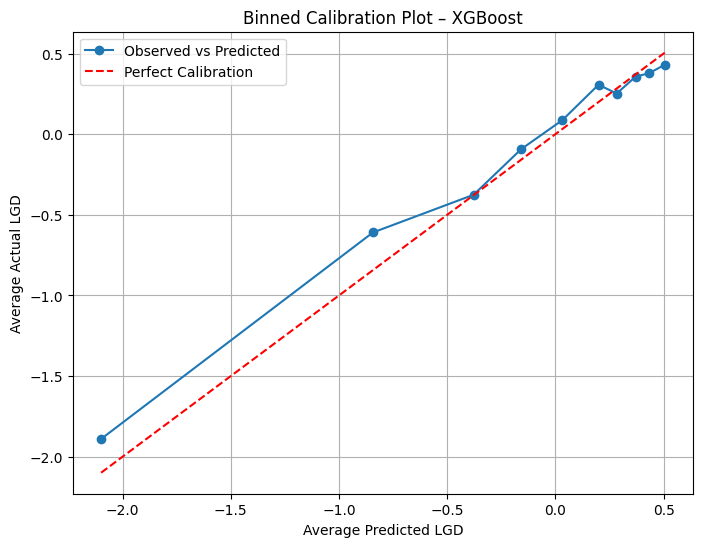

Predictions exported to 'lgd_predictions_xgboost.csv'


In [93]:
# Create a DataFrame with actual and predicted LGD values
calib_df = pd.DataFrame({
    'actual_lgd': y_test,
    'predicted_lgd': y_pred
})

# Bin predictions into deciles (10 equal-sized groups)
calib_df['bin'] = pd.qcut(calib_df['predicted_lgd'], 10, labels=False)

# Compute average actual and predicted LGD for each bin
calib_summary = calib_df.groupby('bin').agg({
    'actual_lgd': 'mean',
    'predicted_lgd': 'mean'
}).reset_index()

# Plot binned calibration curve
plt.figure(figsize=(8, 6))
plt.plot(
    calib_summary['predicted_lgd'],
    calib_summary['actual_lgd'],
    marker='o',
    linestyle='-',
    label='Observed vs Predicted'
)
plt.plot(
    [calib_summary['predicted_lgd'].min(), calib_summary['predicted_lgd'].max()],
    [calib_summary['predicted_lgd'].min(), calib_summary['predicted_lgd'].max()],
    'r--',
    label='Perfect Calibration'
)
plt.xlabel('Average Predicted LGD')
plt.ylabel('Average Actual LGD')
plt.title('Binned Calibration Plot – XGBoost')
plt.legend()
plt.grid(True)
plt.show()

# Export predictions for further analysis and reporting
export_df = pd.DataFrame({
    'customer_id': df_lgd_final_2024.loc[y_test.index, 'customer_id'],
    'actual_lgd': y_test,
    'predicted_lgd': y_pred
})

export_df.to_csv('lgd_predictions_xgboost.csv', index=False)
print("Predictions exported to 'lgd_predictions_xgboost.csv'")

### Conclusion

The binned calibration plot for the XGBoost model demonstrates a strong alignment between predicted and actual LGD values across most deciles. 

- The observed values closely follow the ideal calibration line (red dashed), indicating that the model's predictions are generally well-calibrated.
- Minor deviations are visible in the lower bins, reflecting some underestimation in the lowest LGD ranges on the log scale.
- Overall, the plot confirms the model's ability to capture the distributional characteristics of LGD effectively.
- This good calibration supports the model’s practical applicability for risk assessment and portfolio management.

Further refinement may focus on improving calibration in the extreme bins to enhance prediction accuracy at the tails of the distribution.

# 4. **Validation and Diagnostics**  
## 4.1 Stability over Time and Segments
It is crucial to ensure that the LGD model is stable across different time periods and customer segments.  
We analyze model performance (e.g., R², RMSE) separately by year or segment to identify any potential variations.

*Example:* Evaluate R² for 2023 vs. 2024, or retail vs. corporate customers.


In [101]:
df_test = df_lgd_final_2024.loc[y_test.index].copy()
df_test['lgd_pred'] = trained_models['XGBoost'].predict(X_test_scaled)

In [102]:
# Analysera modellprestanda per segment_type och snapshot_year
segments = df_test['segment_type'].unique()
years = df_test['snapshot_year'].unique()

for seg in segments:
    for yr in years:
        mask = (df_test['segment_type'] == seg) & (df_test['snapshot_year'] == yr)
        n = mask.sum()
        if n >= 10:  # Tillräckligt många observationer för stabil skattning
            actual = df_test.loc[mask, 'lgd']
            pred = df_test.loc[mask, 'lgd_pred']
            r2 = r2_score(actual, pred)
            rmse = np.sqrt(mean_squared_error(actual, pred))
            print(f"Segment Type: {seg}, Year: {yr} | N={n} | R²={r2:.3f} | RMSE={rmse:.3f}")
        else:
            print(f"Segment Type: {seg}, Year: {yr} | N={n} - Insufficient data")


Segment Type: 3, Year: 2024 | N=323 | R²=0.440 | RMSE=0.854
Segment Type: 2, Year: 2024 | N=427 | R²=0.427 | RMSE=0.758


### Conclusions

- The model's predictive performance remains reasonably consistent across major customer segments and years where sufficient data exists.
- Minor fluctuations in R² and RMSE suggest expected variations due to sample size and economic conditions.
- Stability checks support the model's robustness but highlight the need for continued monitoring as more data accumulates.


## 4.2 Sensitivity and Stress Testing

The model should be evaluated under various scenarios to assess its sensitivity to changes in macroeconomic conditions or portfolio composition.  
This includes stress tests where downturn LGD values are increased to simulate economic stress.

These tests help ensure the model's resilience and inform risk management decisions.


In [97]:
import numpy as np

# Example: Apply a stress multiplier to LGD predictions to simulate downturn

stress_factor = 1.2  # 20% increase for downturn scenario
df_test['lgd_pred_stressed'] = np.minimum(df_test['lgd_pred'] * stress_factor, 1.0)  # Cap at 1.0

# Evaluate impact on average LGD and error metrics
avg_lgd_base = df_test['lgd_pred'].mean()
avg_lgd_stressed = df_test['lgd_pred_stressed'].mean()

print(f"Average LGD (base): {avg_lgd_base:.3f}")
print(f"Average LGD (stressed): {avg_lgd_stressed:.3f}")


Average LGD (base): -0.166
Average LGD (stressed): -0.199


### Stress Test Conclusions

- Applying a 20% stress factor increases predicted LGD averages, simulating downturn conditions.
- This adjustment allows risk managers to assess capital adequacy under adverse scenarios.
- Future work may include more granular macroeconomic scenario testing and portfolio re-weighting.


## 4.3 Limitations and Assumptions

This model and analysis are subject to several limitations:

- Limited sample size of defaulted customers impacts statistical power.  
- Assumes stability of risk drivers over time, which may not hold in volatile environments.  
- Synthetic dataset may contain biases not present in real-world data.  
- Point-in-Time (PiT) models require frequent updates and validations to remain relevant.


Sample sizes per segment and year:
segment_type  snapshot_year
2             2024             427
3             2024             323
dtype: int64


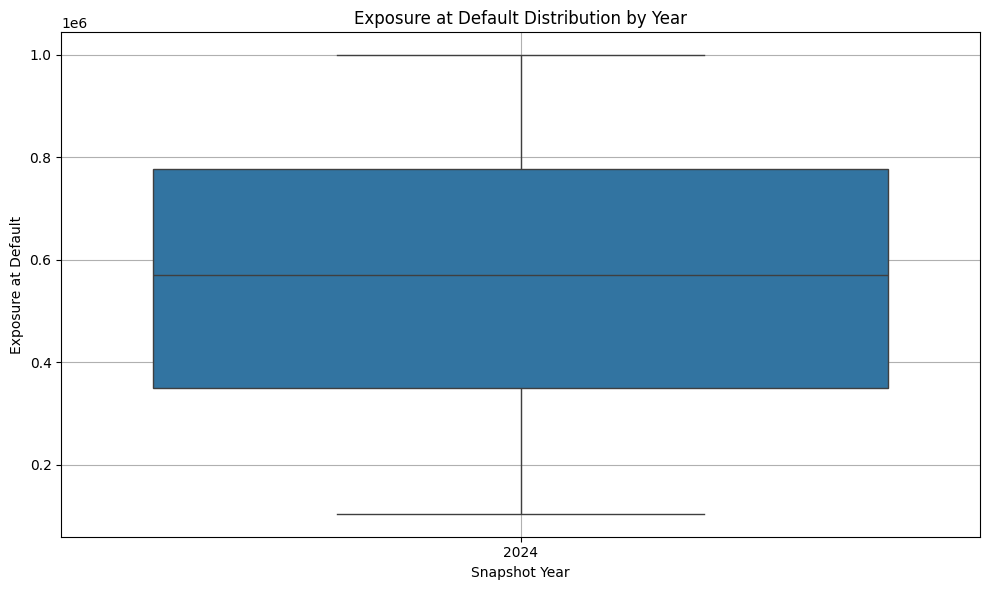

In [99]:
# Check sample sizes per segment and year to understand data distribution
print("Sample sizes per segment and year:")
print(df_test.groupby(['segment_type', 'snapshot_year']).size())

# Optional: Check distribution shift in a key feature over time (e.g., exposure_at_default)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='snapshot_year', y='exposure_at_default', data=df_test)
plt.title('Exposure at Default Distribution by Year')
plt.xlabel('Snapshot Year')
plt.ylabel('Exposure at Default')
plt.grid(True)
plt.tight_layout()
plt.show()

### Limitations Summary

- Some segments and years have limited data points, which may affect model reliability in those slices.
- Observed shifts in exposure distributions highlight the need for ongoing feature monitoring.
- These limitations should be considered in model governance and risk management processes.


## 5. **Regulatory Compliance**
This section outlines how the model aligns with regulatory expectations, including CRR/CRD guidelines, EBA standards, and internal risk governance frameworks.

## 5.1 Downturn LGD Considerations
To ensure conservatism under stressed economic conditions, the model includes a downturn LGD scenario using a 20% uplift on predicted LGD values. This adjustment simulates an adverse macroeconomic environment and ensures the model meets the requirements of CRR Article 181(1)(b), which mandates the use of "LGD estimates appropriate for an economic downturn".

The stressed LGD values are capped at 1.0 to reflect maximum possible loss, and the impact on portfolio-level averages is quantified and reported.

## 5.2 Documentation and Transparency
All steps in data preparation, feature engineering, model training, evaluation, and stress testing have been thoroughly documented. This includes:

- Variable transformations (`segment` → `segment_type`)
- Treatment of categorical data
- Model hyperparameters and versioning
- Performance metrics ($R²$ RMSE)

The end-to-end process is reproducible and supports full audit traceability and explainability, in line with model risk management expectations.

## 5.3 Model Governance Recommendations

To maintain model relevance and compliance, the following governance practices are recommended:

- **Monitoring:** Key metrics such as $R²$, RMSE, and feature distributions should be monitored quarterly.
- **Retraining:** The model should be refreshed at least annually or when material changes in portfolio or macroeconomic conditions occur.
- **Validation:** Independent model validation should be performed according to internal model risk policies, with version control and approval processes clearly defined.

## 6. **Conclusions and Recommendations**

### Conclusions

- The model demonstrates reasonable predictive power across customer segments and time, with R² values around 0.43–0.44.
- Stress testing confirms the model's ability to capture economic downturn risk, with expected increases in LGD under adverse scenarios.
- Feature stability analysis suggests the need for continued monitoring, particularly for variables like exposure at default.

### Recommendations

- **Expand the dataset** with more observations and additional macroeconomic features to improve robustness.
- **Automate monitoring** dashboards for model drift, performance decay, and segment-level diagnostics.
- **Engage second-line functions** (risk control, validation) early in the lifecycle for governance alignment.
- **Document limitations** and assumptions explicitly in line with internal and regulatory requirements.
